In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read data files and update column names
x_train=pd.read_csv('X_train.csv', header=None)
y_train=pd.read_csv('y_train.csv', header=None)
x_test=pd.read_csv('X_test.csv', header=None)
y_test=pd.read_csv('y_test.csv', header=None)

x_train.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']
x_test.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']
y_train.columns = ['y-train']
y_test.columns = ['y-test']

In [26]:
#### PART 1 (A)

In [27]:
# Function to find w-rr 
def w_rr(i, U, s, V):
    s_i = (s)/(i+np.square(s))
    s_ii_sq = (np.square(s))/(i+np.square(s))
    s_i_matrix = pd.DataFrame(np.zeros((s_i.shape[0],s_i.shape[0])))
    for b in range (0,s_i.shape[0]):
        s_i_matrix[b][b] = s_i[b]
    
    w_rr1 = (U.T).dot(y_train)
    w_rr2 = s_i_matrix.dot(w_rr1)
    w_rr = V.dot(w_rr2)
    
    w_rr.columns = ['w'+str(i)]
    w_rr = w_rr.T
    w_rr['deg_f']=sum(s_ii_sq)
    return w_rr


# Find w-rr, for lambda = 0,...,5000
U, s, V = np.linalg.svd(x_train, full_matrices=False)

U = pd.DataFrame(U)
V = pd.DataFrame(V.T)

columns = range(0,7)
w_df = pd.DataFrame(columns=columns)

for i in range(0,5001):
    w_df=w_df.append(w_rr(i, U, s, V),ignore_index=True)

w_df.columns = ['w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'deg_freedom']

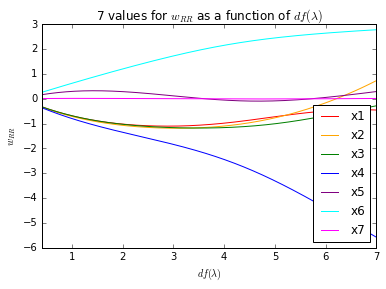

In [28]:
# Plot 7 values in w-rr as a function of df-lambda

fig, ax = plt.subplots()
w_df=w_df.sort_values(by=["deg_freedom"])
w_df.plot.line(y='w1', x='deg_freedom', ax=ax, style='red', label='x1')
w_df.plot.line(y='w2', x='deg_freedom', ax=ax, style='orange', label='x2')
w_df.plot.line(y='w3', x='deg_freedom', ax=ax, style='green', label='x3')
w_df.plot.line(y='w4', x='deg_freedom', ax=ax, style='blue', label='x4')
w_df.plot.line(y='w5', x='deg_freedom', ax=ax, style='purple', label='x5')
w_df.plot.line(y='w6', x='deg_freedom', ax=ax, style='cyan', label='x6')
w_df.plot.line(y='w7', x='deg_freedom', ax=ax, style='magenta', label='x7')
plt.xlabel('$df(\lambda)$')
plt.ylabel('$w_{RR}$')
plt.title('7 values for $w_{RR}$ as a function of $df(\lambda)$')

In [29]:
#print w_df table
w_df

,w1,w2,w3,w4,w5,w6,w7,deg_freedom
5000,-0.325667,-0.335420,-0.323758,-0.360475,0.161169,0.256546,0.008061,0.404520
4999,-0.325717,-0.335472,-0.323808,-0.360532,0.161191,0.256590,0.008063,0.404589
4998,-0.325767,-0.335524,-0.323858,-0.360590,0.161214,0.256633,0.008064,0.404658
4997,-0.325817,-0.335576,-0.323907,-0.360647,0.161237,0.256676,0.008065,0.404727
4996,-0.325867,-0.335627,-0.323957,-0.360704,0.161260,0.256719,0.008066,0.404796
4995,-0.325917,-0.335679,-0.324007,-0.360761,0.161282,0.256763,0.008067,0.404865
4994,-0.325968,-0.335731,-0.324057,-0.360818,0.161305,0.256806,0.008068,0.404935
4993,-0.326018,-0.335783,-0.324107,-0.360875,0.161328,0.256849,0.008069,0.405004
4992,-0.326068,-0.335835,-0.324157,-0.360933,0.161350,0.256893,0.008070,0.405073
4991,-0.326118,-0.335887,-0.324207,-0.360990,0.161373,0.256936,0.008071,0.405142


In [5]:
#### PART 1 (C)

In [6]:
# Predict y, for lambda=0,...,500

columns_wdf = range(0,6)
w_df_predict = pd.DataFrame(columns=columns_wdf)

for i in range(0,51):
    w_df_predict=w_df_predict.append(w_rr(i, U, s, V),ignore_index=True)

w_df_predict = w_df_predict.drop('deg_f', 1)

y_predict = pd.DataFrame(np.dot(x_test,w_df_predict.T))

In [7]:
# Calculate RMSE on predicted values, for lambda=0,...,500
columns_rmse = range(0,51)
y_pred_rmse = pd.DataFrame(columns=columns_rmse)

for n in range(0,y_predict.shape[1]):
    y_pred_rmse[n] = y_test['y-test'] - y_predict[n]

y_pred_rmse_sq = np.square(y_pred_rmse)

y_pred_rmse_sq_sum = pd.DataFrame(y_pred_rmse_sq.sum())
RMSE = np.sqrt(y_pred_rmse_sq_sum)
RMSE.columns = ['RMSE']

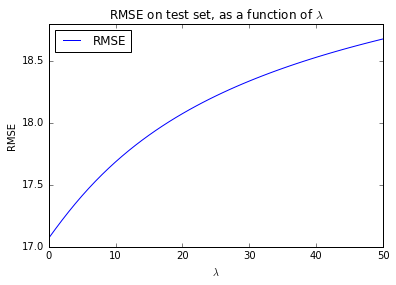

In [19]:
# Plot RMSE as a function of lambda
fig, ax = plt.subplots()

RMSE.plot.line(y='RMSE', ax=ax, style='blue', label='RMSE')
plt.xlabel('$\lambda$')
plt.ylabel('RMSE')
plt.title('RMSE on test set, as a function of $\lambda$')

In [9]:
#### PART 2 (D)

In [10]:
# Set up data frames to learn pth-order regression model for p=1,2,3
x_train_2 = np.square(x_train[['x1', 'x2', 'x3', 'x4', 'x5', 'x6',]])
x_train_2.columns = ['x1^2','x2^2', 'x3^2', 'x4^2', 'x5^2', 'x6^2']
x_train_3 = np.power(x_train[['x1', 'x2', 'x3', 'x4', 'x5', 'x6',]], 3)
x_train_3.columns = ['x1^3', 'x2^3', 'x3^3', 'x4^3', 'x5^3', 'x6^3']

x_test_2 = np.square(x_test[['x1', 'x2', 'x3', 'x4', 'x5', 'x6',]])
x_test_2.columns = ['x1^2','x2^2', 'x3^2', 'x4^2', 'x5^2', 'x6^2']
x_test_3 = np.power(x_test[['x1', 'x2', 'x3', 'x4', 'x5', 'x6',]], 3)
x_test_3.columns = ['x1^3', 'x2^3', 'x3^3', 'x4^3', 'x5^3', 'x6^3']

x_train_p2 = pd.concat([x_train, x_train_2], axis=1)
x_train_p3 = pd.concat([x_train, x_train_2, x_train_3], axis=1)
x_test_p2 = pd.concat([x_test, x_test_2], axis=1)
x_test_p3 = pd.concat([x_test, x_test_2, x_test_3], axis=1)

In [11]:
# Find w-rr, for p=2,3, for lambda = 0,...,500

U_2, s_2, V_2 = np.linalg.svd(x_train_p2, full_matrices=False)
U_3, s_3, V_3 = np.linalg.svd(x_train_p3, full_matrices=False)

U_2 = pd.DataFrame(U_2)
V_2 = pd.DataFrame(V_2.T)
U_3 = pd.DataFrame(U_3)
V_3 = pd.DataFrame(V_3.T)

columns2 = range(0,13)
w_df_p2 = pd.DataFrame(columns=columns2)
columns3 = range(0,19)
w_df_p3 = pd.DataFrame(columns=columns3)

for i in range(0,501):
    w_df_p2=w_df_p2.append(w_rr(i, U_2, s_2, V_2),ignore_index=True)
    w_df_p3=w_df_p3.append(w_rr(i, U_3, s_3, V_3),ignore_index=True)

In [12]:
# Predict y and calculate RMSE, for p=1 and lambda=0,...,500

col_w_p1 = range(0,7)
w_predict_p1 = pd.DataFrame(columns=col_w_p1)

for i in range(0,501):
    w_predict_p1=w_predict_p1.append(w_rr(i, U, s, V),ignore_index=True)

w_predict_p1 = w_predict_p1.drop('deg_f', 1)

y_predict_p1 = pd.DataFrame(np.dot(x_test,w_predict_p1.T))

columns_rmse_p1 = range(0,501)
y_pred_rmse_p1 = pd.DataFrame(columns=columns_rmse_p1)

for n in range(0,y_predict_p1.shape[1]):
    y_pred_rmse_p1[n] = y_test['y-test'] - y_predict_p1[n]

y_pred_rmse_sq_p1 = np.square(y_pred_rmse_p1)

y_pred_rmse_sq_sum_p1 = pd.DataFrame(y_pred_rmse_sq_p1.sum())
RMSE_p1 = np.sqrt(y_pred_rmse_sq_sum_p1)
RMSE_p1.columns = ['RMSE-p1']

In [13]:
# Predict y and calculate RMSE, for p=2 and lambda=0,...,500

col_w_p2 = range(0,13)
w_predict_p2 = pd.DataFrame(columns=col_w_p2)

for i in range(0,501):
    w_predict_p2=w_predict_p2.append(w_rr(i, U_2, s_2, V_2),ignore_index=True)

w_predict_p2 = w_predict_p2.drop('deg_f', 1)

y_predict_p2 = pd.DataFrame(np.dot(x_test_p2,w_predict_p2.T))

columns_rmse_p2 = range(0,501)
y_pred_rmse_p2 = pd.DataFrame(columns=columns_rmse_p2)

for n in range(0,y_predict_p2.shape[1]):
    y_pred_rmse_p2[n] = y_test['y-test'] - y_predict_p2[n]

y_pred_rmse_sq_p2 = np.square(y_pred_rmse_p2)

y_pred_rmse_sq_sum_p2 = pd.DataFrame(y_pred_rmse_sq_p2.sum())
RMSE_p2 = np.sqrt(y_pred_rmse_sq_sum_p2)
RMSE_p2.columns = ['RMSE-p2']

In [14]:
# Predict y and calculate RMSE, for p=3 and lambda=0,...,500

col_w_p3 = range(0,19)
w_predict_p3 = pd.DataFrame(columns=col_w_p3)

for i in range(0,501):
    w_predict_p3=w_predict_p3.append(w_rr(i, U_3, s_3, V_3),ignore_index=True)

w_predict_p3 = w_predict_p3.drop('deg_f', 1)

y_predict_p3 = pd.DataFrame(np.dot(x_test_p3,w_predict_p3.T))

columns_rmse_p3 = range(0,501)
y_pred_rmse_p3 = pd.DataFrame(columns=columns_rmse_p3)

for n in range(0,y_predict_p3.shape[1]):
    y_pred_rmse_p3[n] = y_test['y-test'] - y_predict_p3[n]

y_pred_rmse_sq_p3 = np.square(y_pred_rmse_p3)

y_pred_rmse_sq_sum_p3 = pd.DataFrame(y_pred_rmse_sq_p3.sum())
RMSE_p3 = np.sqrt(y_pred_rmse_sq_sum_p3)
RMSE_p3.columns = ['RMSE-p3']

When p=1, the minimum RMSE of 17.0679611208 is at lambda = 0
When p=2, the minimum RMSE of 14.2095043394 is at lambda = 23
When p=3, the minimum RMSE of 14.225971943 is at lambda = 21


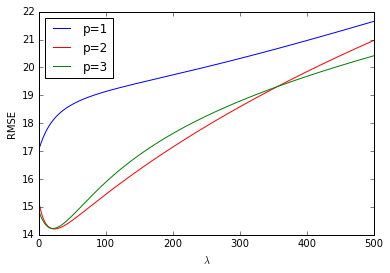

In [15]:
# Plot RMSE as a function of lambda for p=1,2,3

RMSE_all_p = pd.concat([RMSE_p1, RMSE_p2, RMSE_p3], axis=1)

fig, ax = plt.subplots()

RMSE_all_p.plot.line(y='RMSE-p1', ax=ax, style='blue', label='p=1')
RMSE_all_p.plot.line(y='RMSE-p2', ax=ax, style='red', label='p=2')
RMSE_all_p.plot.line(y='RMSE-p3', ax=ax, style='green', label='p=3')

plt.xlabel('$\lambda$')
plt.ylabel('RMSE')

print 'When p=1, the minimum RMSE of', (RMSE_all_p['RMSE-p1'].min()), 'is at lambda =', (RMSE_all_p['RMSE-p1'].argmin())
print 'When p=2, the minimum RMSE of', (RMSE_all_p['RMSE-p2'].min()), 'is at lambda =',(RMSE_all_p['RMSE-p2'].argmin()) 
print 'When p=3, the minimum RMSE of', (RMSE_all_p['RMSE-p3'].min()), 'is at lambda =',(RMSE_all_p['RMSE-p3'].argmin())